In [ ]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('hour.csv')
data['dteday'] = pd.to_datetime(data['dteday'])
data['hour'] = data['hr']
data['day'] = data['dteday'].dt.day
data['month'] = data['dteday'].dt.month
data['year'] = data['dteday'].dt.year
data['day_of_week'] = data['dteday'].dt.dayofweek
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hour', 'day', 'month', 'year', 'day_of_week']
target = 'cnt'

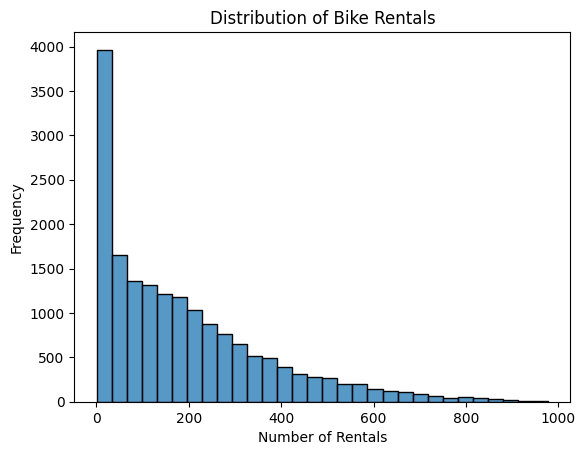

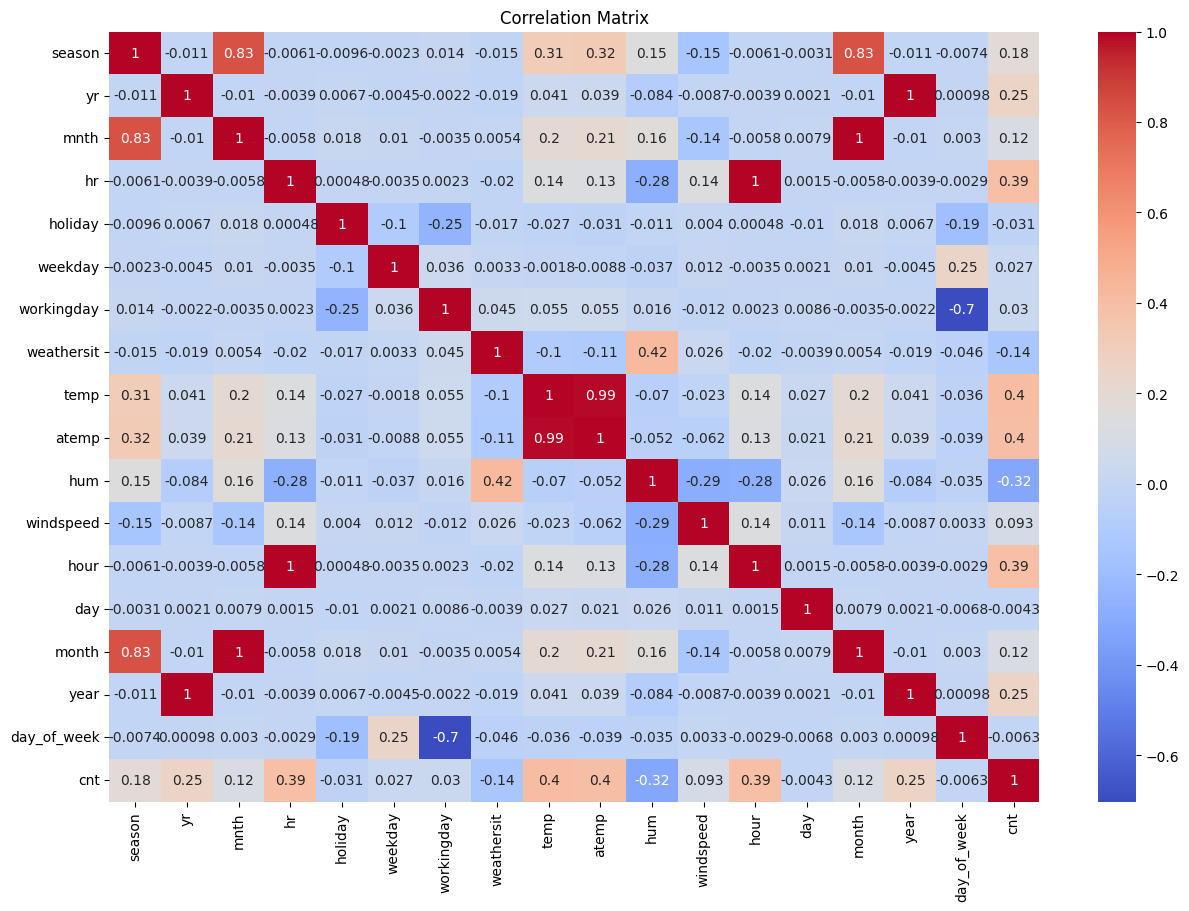

In [ ]:
sns.histplot(data[target], bins=30)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()
corr_matrix = data[features + [target]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 24.480215765247415
Mean Squared Error: 1681.8223476697356
Root Mean Squared Error: 41.01002740391349


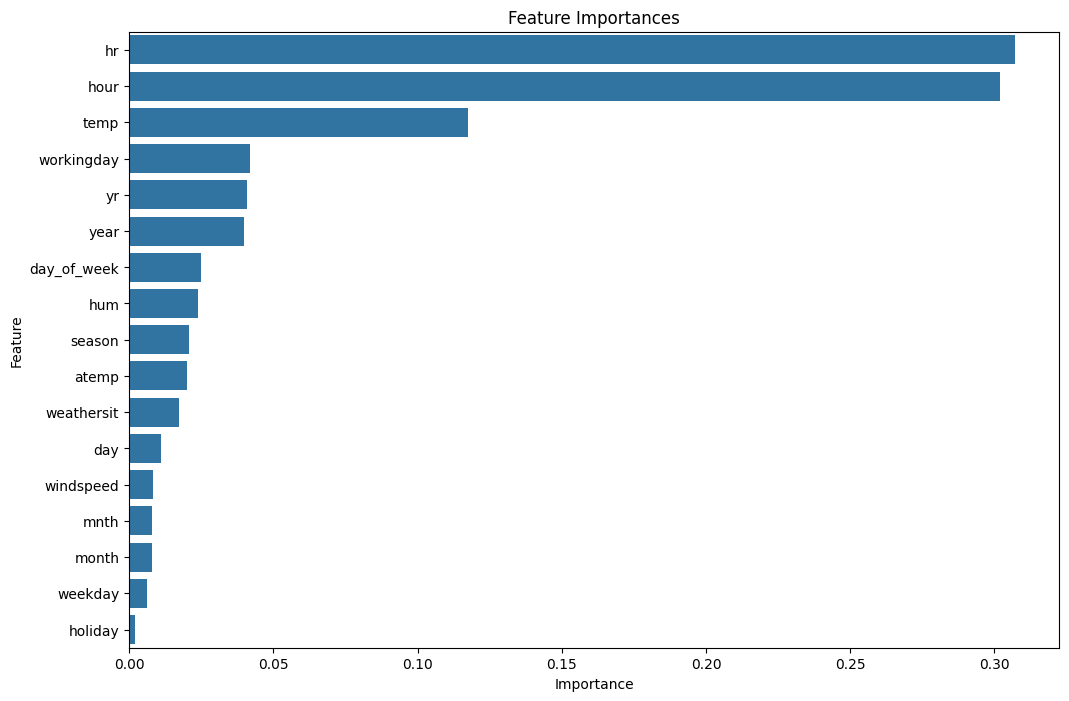

In [ ]:
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()